# Nomor 2 Pretest : Victoria Dataset

## Load the Required Libraries

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1. Import Dataset : Load the Dataset

In [3]:
df = pd.read_csv('victoria.csv')

## 2. Exploratory Data Analysis : Create summary of the dataset

In [4]:
df.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


In [5]:
df.shape

(218, 16)

In [9]:
df.mode().head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,270000,1061500015,Z41,3B,11.0,3.0,5.0,E100,1A,1.0,0.0,1.0,S3,3A,1.0
1,2,NaN,1065999985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1155899963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1303699951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,7479000092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(df.columns)

Index(['row.labels', 'totalprice', 'area', 'zone', 'category', 'age', 'floor',
       'rooms', 'out', 'conservation', 'toilets', 'garage', 'elevator',
       'streetcategory', 'heating', 'tras'],
      dtype='object')


In [11]:
df.median()

row.labels    109.5
age            16.0
floor           4.0
rooms           5.0
toilets         1.0
garage          0.0
elevator        1.0
tras            1.0
dtype: float64

In [6]:
df.describe()

,row.labels,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


In [7]:
df.dtypes

row.labels         int64
totalprice        object
area              object
zone              object
category          object
age                int64
floor              int64
rooms              int64
out               object
conservation      object
toilets            int64
garage             int64
elevator           int64
streetcategory    object
heating           object
tras               int64
dtype: object

In [12]:
df.isnull().sum()

row.labels        0
totalprice        0
area              0
zone              0
category          0
age               0
floor             0
rooms             0
out               0
conservation      0
toilets           0
garage            0
elevator          0
streetcategory    0
heating           0
tras              0
dtype: int64

In [18]:
#Data Cleansing
df['totalprice'] = df['totalprice'].replace(r'[,]','', regex=True)
df['area'] = df['area'].replace(r'[,]','', regex=True)

In [19]:
#Convert to numeric
df['totalprice'] = pd.to_numeric(df['totalprice'])
df['area'] = pd.to_numeric(df['area'])

## 3. Data Visualization

Pertama, membuat plot distribusi normal dan regresi linier.

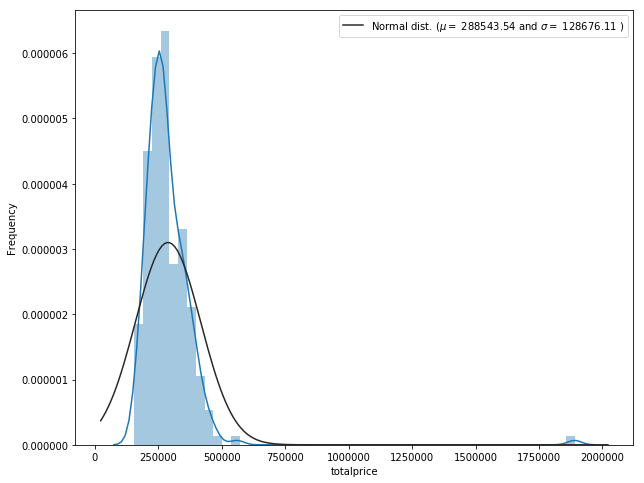

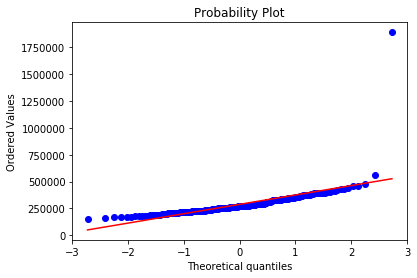

In [22]:
plt.subplots(figsize=(10,8))
sns.distplot(df['totalprice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df['totalprice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['totalprice'], plot=plt)
plt.show()

**Dapat dilihat bahwa distribusi yang dihasilkan adalah cenderung ke kiri atau positive skewed normal distribution, maka harus ditransformasi.<br>
Transformasi ini menggunakan log function.**

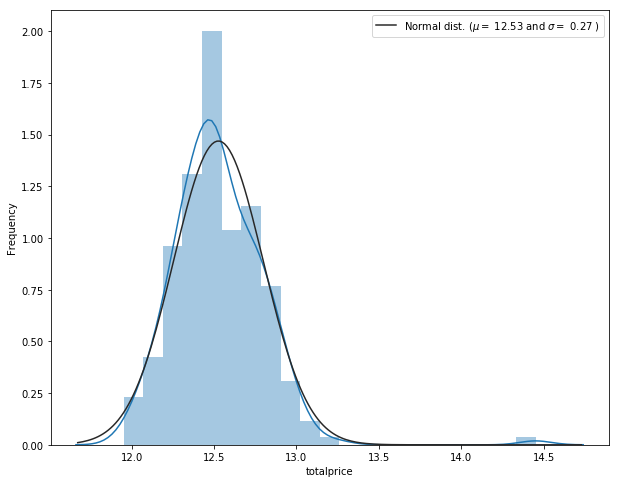

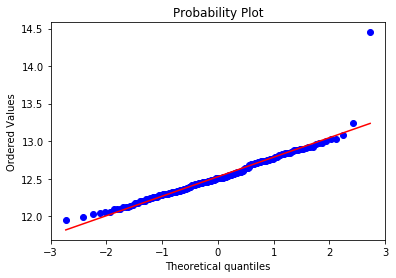

In [23]:
#we use log function which is in numpy
df['totalprice'] = np.log1p(df['totalprice'])

#Check again for more normal distribution

plt.subplots(figsize=(10,8))
sns.distplot(df['totalprice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df['totalprice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['totalprice'], plot=plt)
plt.show()

**Dari hasil transformasi dapat dilihat bahwa distribusi nya sudah normal dan dapat dikatakan bahwa harga dari apartemen memiliki rata-rata = 12.53 atau kisaran 'totalprice' = 280000.**

Selanjutnya, dapat dilihat korelasi antar variabel

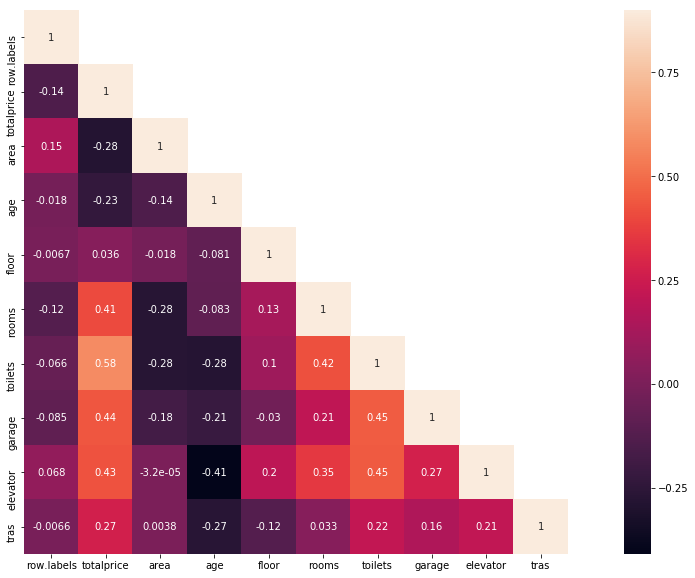

In [26]:
#create correlation with heatmap
corr = df.corr(method = 'pearson')
#convert correlation to numpy array
mask = np.array(corr)
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

**Dapat dilihat bahwa korelasi tertinggi dari variabel-variable tersebut adalah** <br>
**- 'toilets' dengan 'totalprice' sebesar 0.58**<Br>
**- 'garage' dan 'elevator' dengan 'toilets' sebesar 0.45**
    
**yang dapat dikatakan bahwa terdapat korelasi positif yang lumayan tinggi antar dua variabel tersebut terutama adalah antara 'toilets' dan 'totalprice'**

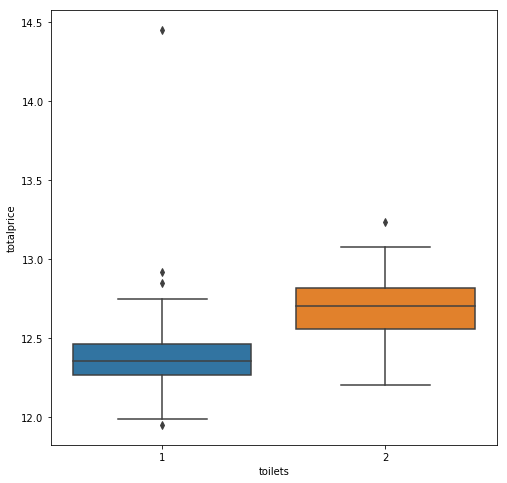

In [35]:
#boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(x=df.toilets, y=df.totalprice)

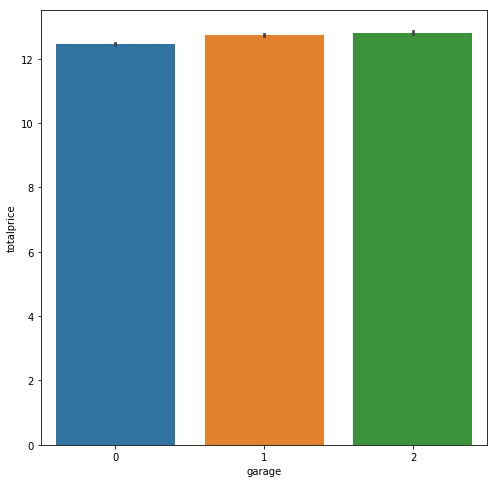

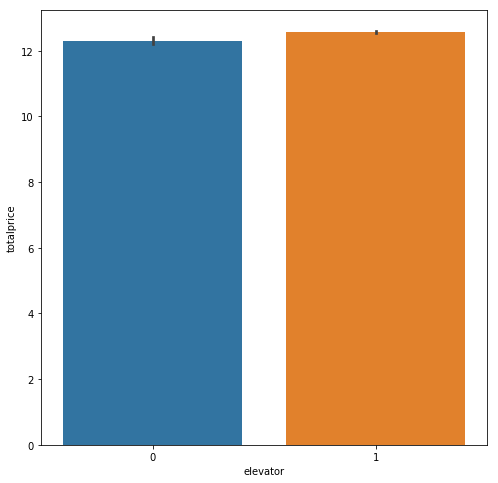

In [40]:
#barplot
plt.figure(figsize=(8, 8))
sns.barplot(x=df.garage, y=df.totalprice)
plt.figure(figsize=(8, 8))
sns.barplot(x=df.elevator, y=df.totalprice)

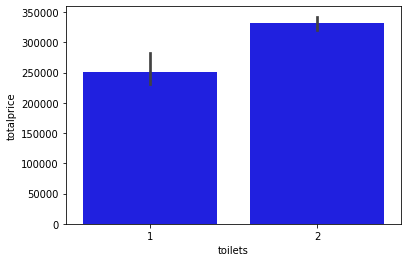

In [29]:
#Bivariate Analysis antara totalprice dan toilets
sns.barplot(data=df, x=df['toilets'], y=df['totalprice'], color='blue')

- Dapat dilihat bahwa semakin banyak toilets maka akan memberi dampak semakin mahal sebuah apartment.

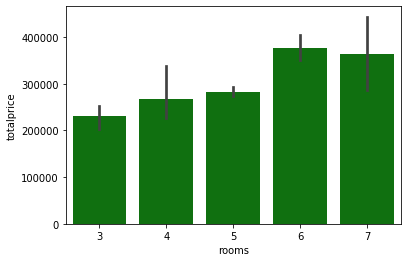

In [30]:
#Bivariate Analysis antara totalprice dan toilets
sns.barplot(data=df, x=df['rooms'], y=df['totalprice'], color='green')

- Semakin banyak rooms maka semakin mahal sebuah apartment

## 4. Feature Selection

- Saya akan memilih variabel dengan type data numerik karena model machine learning hanya menerima type data yang berbentuk numerik.
- Terkecuali conservation yang akan saya rubah ke dalam bentuk numerikal.

In [36]:
#Mengubah nilai conservation
dicti = {
    '2B':3,
    '3A':3,
    '2A':2,
    '1A':1
}
df['conservation'] = df['conservation'].replace(dicti)

In [42]:
new_df = df.copy()

In [46]:
#Menghapus kolom yang tidak perlu
drop = ['zone', 'category', 'out', 'streetcategory', 'heating']
new_df.drop(columns=drop, inplace=True)

In [52]:
#Membuat one hot encoding
new_df['conservation'] = pd.Categorical(new_df['conservation'])
new_df = pd.get_dummies(new_df)

## 5. Modelling

In [56]:
#Memakai Linear regression
lin_reg = LinearRegression()

In [59]:
#membuat variabel x dan y
x = new_df.drop(columns = ['totalprice'])
y = new_df['totalprice']

In [62]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [63]:
#training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
#melakukan prediksi
y_pred = lin_reg.predict(x_test)

In [72]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [73]:
#check error
print(f'Nilai MAE {mean_absolute_error(y_pred, y_test)}')
print(f'Nilai MAPE {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 33615.3649038535
Nilai MAPE 12.145438875611934)


- Harga memiliki error sebesar 33 ribu dengan nilai MAPE sebesar 12%